In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time, datetime
import calendar
import warnings
warnings.filterwarnings('ignore')

In [9]:
df1 = pd.read_csv('My Uber Drives - 2016.csv')

In [10]:
df1.shape

(1156, 7)

In [11]:
df1.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [13]:
df1.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [14]:
#rename columns to remove asteriks

df1 = df1.rename(columns= {"START_DATE*" : "START_DATE", 
                           "END_DATE*": "END_DATE",
                           "CATEGORY*": "CATEGORY",
                           "START*":"START", 
                           "STOP*":"STOP",
                           "MILES*":"MILES",
                           "PURPOSE*":"PURPOSE"})

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [16]:
#drop NaN values
df1 = df1.dropna().reset_index(drop=True)

In [17]:
df1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [20]:
df1['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Lake Wellingborough',
       'Fayetteville Street', 'Raleigh', 'Whitebridge', 'Hazelwood',
       'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill', 'Northwoods',
       'Edgehill Farms', 'Eastgate', 'East Elmhurst', 'Long Island City',
       'Katunayaka', 'Colombo', 'Nugegoda', 'Unknown Location',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Preston',
       'Heritage Pines', 'Tanglewood', 'Waverly Place', 'Wayne Ridge',
       'Westpark Place', 'East Austin', 'The Drag', 'South Congress',
       'Georgian Acres', 'North Austin', 'West University', 'Austin',
       'Katy', 'Sharpstown', 'Sugar Land', 'Galveston', 'Port Bolivar',
       'Washington Avenue',

In [21]:
#check for incorrectness in START column
df1[df1.START.str.contains('\?') == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
116,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.1,Meeting
618,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
619,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
620,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
621,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
623,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
624,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
626,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
627,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
629,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies


In [22]:
#replace and correct START and STOP column
df1.START = df1.START.replace({"\?":"a"}, regex = True)
df1.STOP = df1.STOP.replace({"\?":"a"}, regex = True)

In [23]:
#check for incorrectness in START column
df1[df1.START.str.contains('\?') == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE


In [24]:
# separating date and time into Hour, Day and Month

df1.START_DATE = pd.to_datetime(df1.START_DATE, format="%m/%d/%Y %H:%M")
df1.END_DATE = pd.to_datetime(df1.END_DATE, format="%m/%d/%Y %H:%M")

df1['HOUR'] = [x.hour for x in df1.START_DATE]
df1['DAY'] = [x.day for x in df1.START_DATE]
df1['MONTH'] = [x.month for x in df1.START_DATE]
df1['WEEKDAY'] = [calendar.day_name[x.dayofweek] for x in df1.START_DATE]
df1['DAY_OF_WEEK'] = [x.dayofweek for x in df1.START_DATE]

In [25]:
#Updated Data Check
df1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


### Analysis and Visualisation

#### Question 1:

What is the category of the most ordered ride?

<AxesSubplot: xlabel='CATEGORY', ylabel='count'>

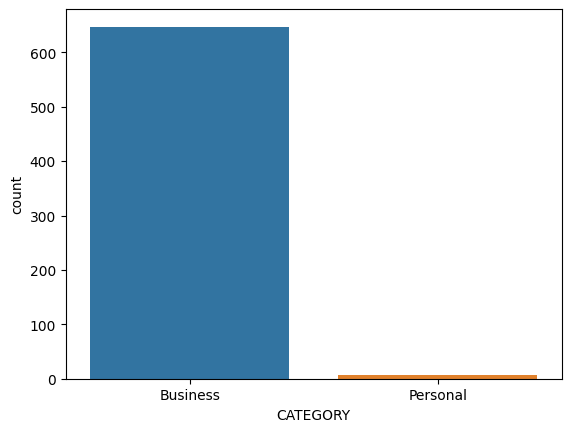

In [26]:
#plot category
sns.countplot(x='CATEGORY', data= df1)

Most rides ordered were for Businesses or belong to the `'Business'` category

#### Question 2:

What are the purposes for this rides?

<AxesSubplot: xlabel='count', ylabel='PURPOSE'>

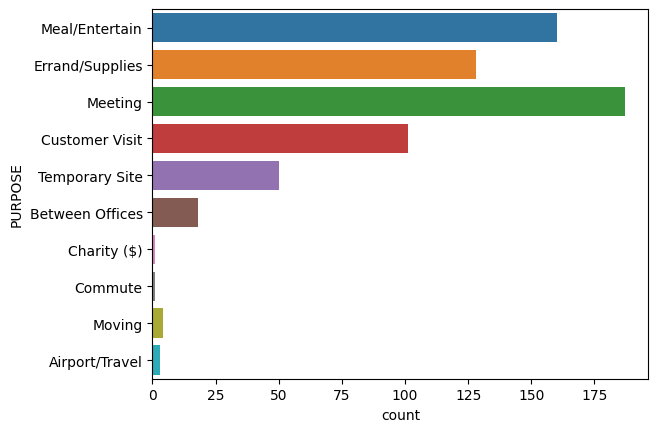

In [27]:
sns.countplot(y='PURPOSE', data=df1)

Most rides were for meetings closely followed by `Meal/Entertainment`

#### Question 3:
    What is the highest trip by miles?

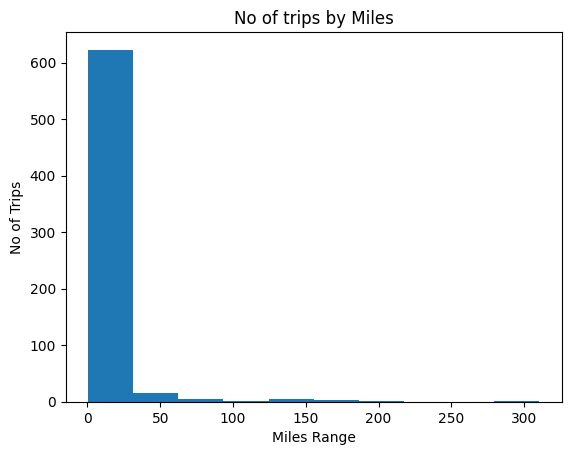

In [28]:
df1['MILES'].plot.hist()

plt.xlabel("Miles Range")
plt.ylabel("No of Trips")

plt.title("No of trips by Miles")

plt.show()

Highest trips were between 0 - 25miles

#### Question 4:
What is the peak period for Uber rides? What times do people order rides the most?

Text(0.5, 1.0, 'No of trips vs hour of day')

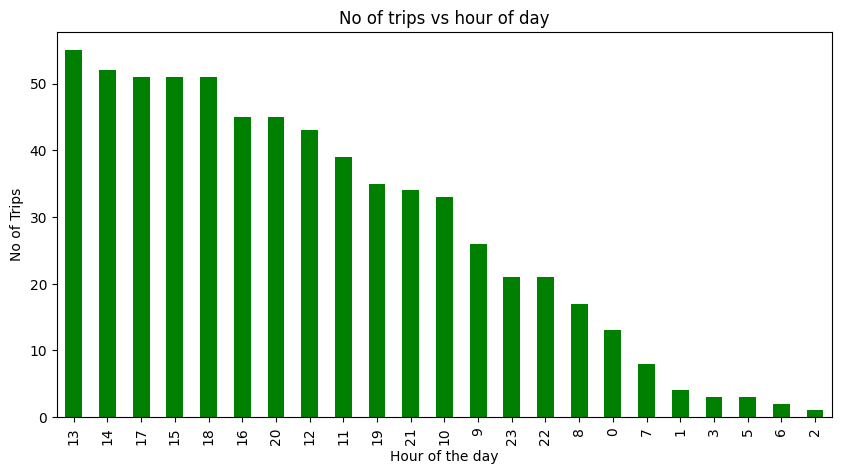

In [31]:
hours = df1['HOUR'].value_counts()
hours.plot(kind='bar', color="green", figsize=(10,5))
plt.xlabel('Hour of the day')
plt.ylabel('No of Trips')
plt.title("No of trips vs hour of day")

Peak hours are between `1PM and 6PM`. Low ride hour is `2AM`, which is the lunch hours.

#### Question 5: 
What is the busist ride day of the week?

Text(0.5, 1.0, 'No of trips vs Days')

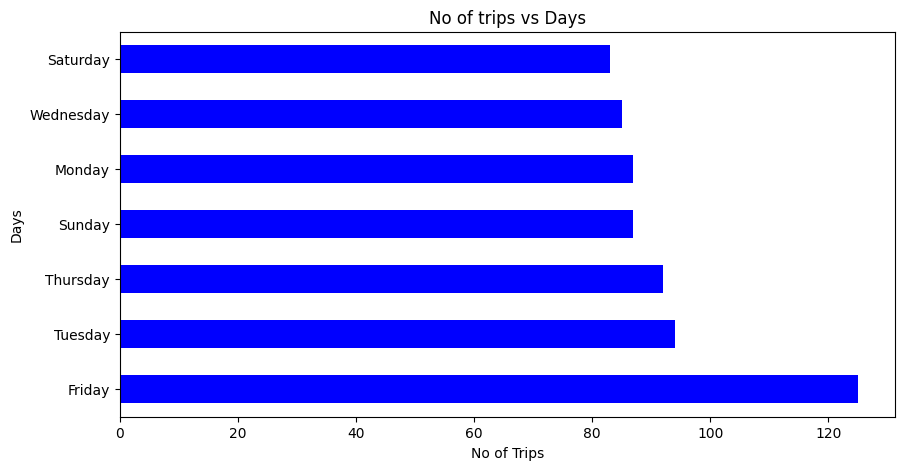

In [32]:
days = df1['WEEKDAY'].value_counts()
days.plot(kind='barh', color = 'blue', figsize=(10,5))
plt.xlabel('No of Trips')
plt.ylabel('Days')
plt.title("No of trips vs Days")

`Fridays` are the busiest days of the week

#### Question 6:
What month is the busiest ride month?

Text(0.5, 1.0, 'No of trips Vs Months')

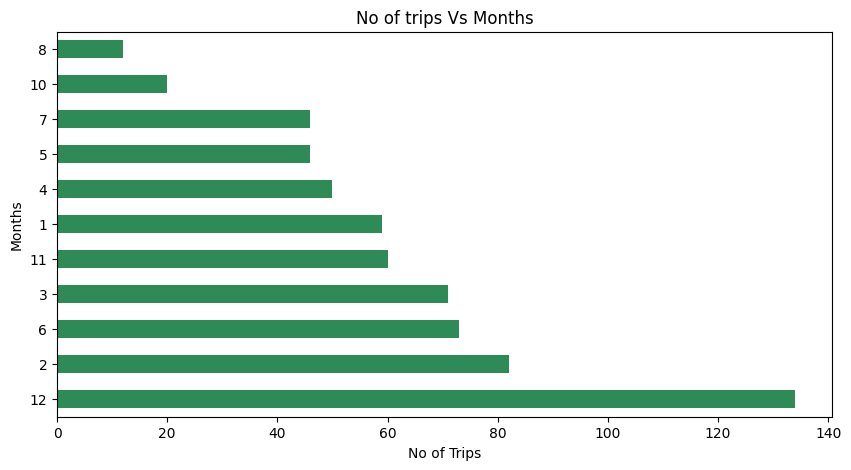

In [33]:
months = df1['MONTH'].value_counts()
months.plot(kind='barh', color='seagreen', figsize=(10,5))
plt.xlabel('No of Trips')
plt.ylabel('Months')
plt.title('No of trips Vs Months')

`December` remains the busiest month of the year for rides

Looking into december closely:

Text(0.5, 1.0, 'No of trips vs days of december')

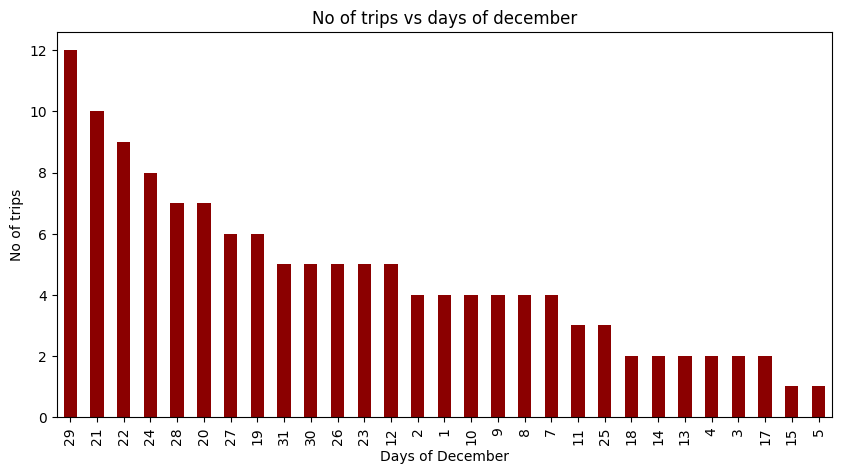

In [36]:
decem = df1['DAY'][df1['MONTH']==12].value_counts()
decem.plot(kind='bar', color='darkred', figsize=(10,5))
plt.xlabel('Days of December')
plt.ylabel("No of trips")
plt.title("No of trips vs days of december")

`29th of December` has the most ride for the month

#### Question 7:
What are the most pickup points for the year 2016?

Text(0.5, 1.0, 'No of Trips by Pick up points')

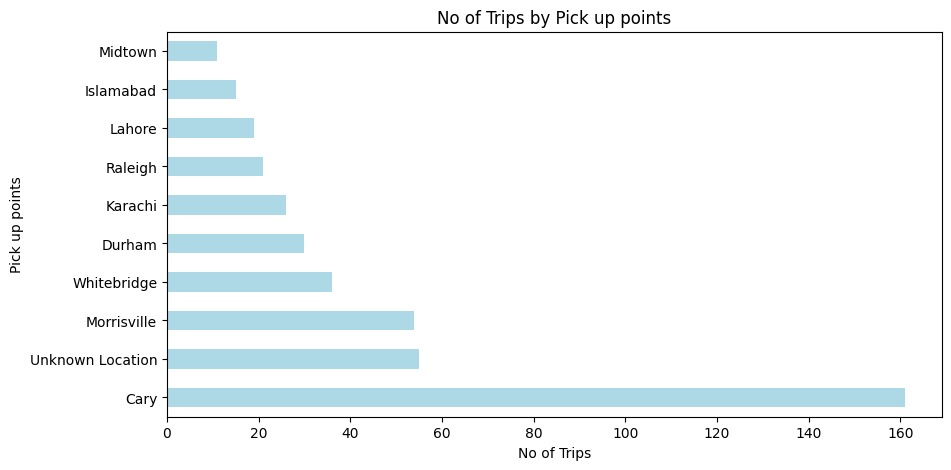

In [37]:
pick_up = df1['START'].value_counts().nlargest(10)
pick_up.plot(kind='barh', color='lightblue', figsize=(10,5))
plt.xlabel("No of Trips")
plt.ylabel("Pick up points")
plt.title("No of Trips by Pick up points")

Does this mean more Uber user live in Cary? Does this mean there are inadequate rides around other areas?

#### Question 8:
What is the most destination of these rides?

Text(0.5, 1.0, 'No of Trips by Drop points')

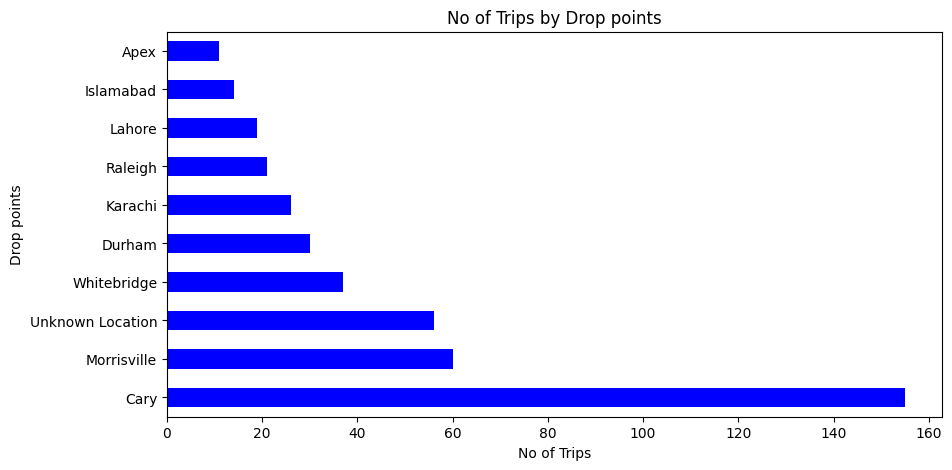

In [38]:
drop_point = df1['STOP'].value_counts().nlargest(10)
drop_point.plot(kind='barh', color='blue', figsize=(10,5))
plt.xlabel("No of Trips")
plt.ylabel("Drop points")
plt.title("No of Trips by Drop points")

`Cary` 
Same as pick up points. 🤔

#### Question 9:
    What are the pick up to drop-off numbers like?

Text(0.5, 1.0, 'Pick up to drop off points Trip Counts')

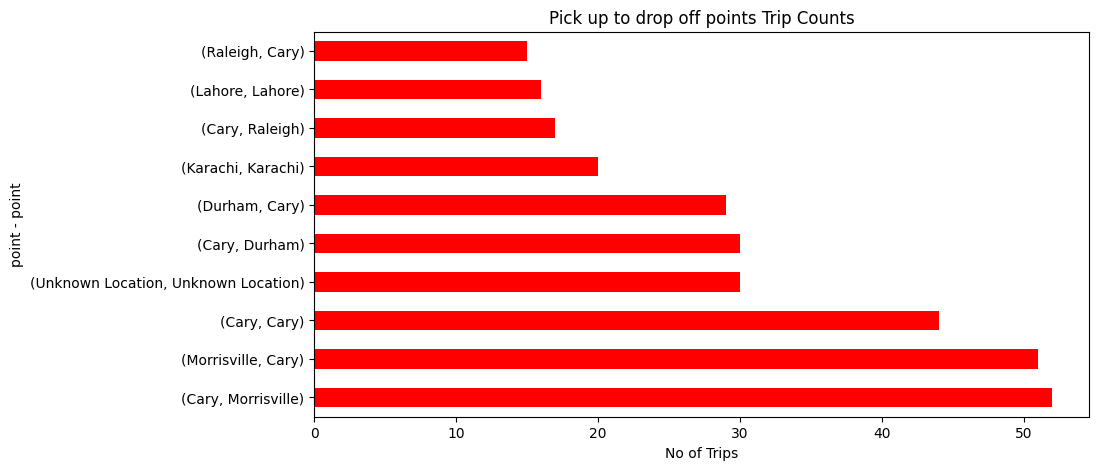

In [40]:
pick_drop = df1[['START', 'STOP']].value_counts().nlargest(10)
pick_drop.plot(kind='barh', color='red', figsize=(10,5))
plt.xlabel('No of Trips')
plt.ylabel('point - point')
plt.title('Pick up to drop off points Trip Counts')

Frequent Travels occur most between CaRY and Morrisville

In [41]:
#### EDA SUMMARY
print("\n............Average length of the trip........\n")
print('Business:', round(df1[df1['CATEGORY'] == 'Business'].MILES.mean(), 3))
print('Personal:', round(df1[df1['CATEGORY'] == 'Personal'].MILES.mean(), 3))
print('Meal/Entertain:', round(df1[df1['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 3))


............Average length of the trip........

Business: 10.97
Personal: 35.583
Meal/Entertain: 5.698


What are the implications of these findings on the business and how can the business be improved as a result?

## EDA of Boston Uber Data


In [42]:
df2 = pd.read_csv('rideshare_kaggle.csv')

In [43]:
df2

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [44]:
df2.shape

(693071, 57)